
### 26/04/24 - Notebook
Create fits for data for helena from this document:
https://docs.google.com/spreadsheets/d/1enLCbIA-EhJ0RN5q7pSBM_5f1HH-1pJupvpuEy02i1I/edit#gid=336032425

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import scipy.special as special
from scipy.stats import skewnorm
from scipy.optimize import curve_fit


In [3]:
data = pd.read_csv('argon.csv')

In [4]:
display(data)

,Cathode Voltage,Cathode Rate (V/s),Gate Voltage,Gate Rate (V/s),Last Ring Voltage,Last Ring Rate (V/s)
0,1200,50,600,10,612.0,10
1,2400,50,1200,10,1224.0,10
2,3600,50,1800,10,1836.0,10
3,4800,50,2400,10,2448.0,10
4,6000,50,3000,10,3060.0,10
5,7200,10,3600,10,3672.0,10
6,8400,10,4200,10,4284.0,10
7,9600,10,4800,10,4896.0,10
8,10800,10,5400,10,5508.0,10
9,12000,10,6000,10,6120.0,10


### develop these three voltages on a time scale

In [54]:
cathode_values = [0]
i = 0
j = 0

while (i != 18000):
    if i < data['Cathode Voltage'][j]:
        i += data['Cathode Rate (V/s)'][j]
    else:
        j += 1
    
    cathode_values.append(i)

gate_values = [0]
i = 0
j = 0

while (i != 9000):
    if i < data['Gate Voltage'][j]:
        i += data['Gate Rate (V/s)'][j]
    else:
        j += 1
    
    gate_values.append(i)

lr_values = []
i = 0.0
j = 0

while (i < 9187.0):
    if i < data['Last Ring Voltage'][j]:
        # for now we do 12, as 10 doesn't work exactly how you'd like
        i += 12
        print(i)
        #i += data['Last Ring Rate (V/s)'][j]
    else:
        j += 1
    
    lr_values.append(i)

12.0
24.0
36.0
48.0
60.0
72.0
84.0
96.0
108.0
120.0
132.0
144.0
156.0
168.0
180.0
192.0
204.0
216.0
228.0
240.0
252.0
264.0
276.0
288.0
300.0
312.0
324.0
336.0
348.0
360.0
372.0
384.0
396.0
408.0
420.0
432.0
444.0
456.0
468.0
480.0
492.0
504.0
516.0
528.0
540.0
552.0
564.0
576.0
588.0
600.0
612.0
624.0
636.0
648.0
660.0
672.0
684.0
696.0
708.0
720.0
732.0
744.0
756.0
768.0
780.0
792.0
804.0
816.0
828.0
840.0
852.0
864.0
876.0
888.0
900.0
912.0
924.0
936.0
948.0
960.0
972.0
984.0
996.0
1008.0
1020.0
1032.0
1044.0
1056.0
1068.0
1080.0
1092.0
1104.0
1116.0
1128.0
1140.0
1152.0
1164.0
1176.0
1188.0
1200.0
1212.0
1224.0
1236.0
1248.0
1260.0
1272.0
1284.0
1296.0
1308.0
1320.0
1332.0
1344.0
1356.0
1368.0
1380.0
1392.0
1404.0
1416.0
1428.0
1440.0
1452.0
1464.0
1476.0
1488.0
1500.0
1512.0
1524.0
1536.0
1548.0
1560.0
1572.0
1584.0
1596.0
1608.0
1620.0
1632.0
1644.0
1656.0
1668.0
1680.0
1692.0
1704.0
1716.0
1728.0
1740.0
1752.0
1764.0
1776.0
1788.0
1800.0
1812.0
1824.0
1836.0
1848.0
1860.0
1872.0

In [32]:
print(len(cathode_values))

1336


In [56]:
time_c = np.linspace(0, len(cathode_values)-1, num = len(cathode_values), dtype = int)
time_g = np.linspace(0, len(gate_values)-1, num = len(gate_values), dtype = int)
time_el = np.linspace(0, len(lr_values)-1, num = len(lr_values), dtype = int)



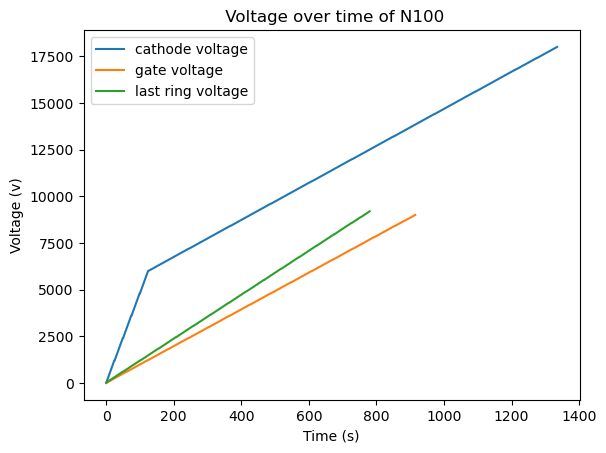

In [61]:
plt.plot(time_c, cathode_values, label = 'cathode voltage')
plt.plot(time_g, gate_values, label = 'gate voltage')
plt.plot(time_el, lr_values, label = 'last ring voltage')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Voltage (v)')
#plt.yscale('log')
plt.title(' Voltage over time of N100')
plt.show()
